<a href="https://colab.research.google.com/github/BhavyaShah99/COG403-Project-Bhavya-Dhruv-Abhishek/blob/main/cog403_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

### **Data Loading and Cleansing of CIFAR-100**

In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar100.load_data(label_mode="coarse")

In [ ]:
train_labels

array([[11],
       [15],
       [ 4],
       ...,
       [ 8],
       [ 7],
       [ 1]])

In [ ]:
# Normalize all RGB values in our images dataset
train_images = train_images / 255.0
test_images = test_images / 255.0

# Reshaping the arrays of labels to be single dimensional arrays
train_labels = train_labels.reshape(-1,)
test_labels = test_labels.reshape(-1,)

train_labels

array([11, 15,  4, ...,  8,  7,  1])

In [ ]:
# Array of all possible coarse(superclasses) and fine(subclasses) labels for our images in the CIFAR100 data
classes_coarse = ['aquatic_mammals', 'fish', 'flowers', 'food_containers', 'fruit_and_vegetables', 'household_electrical_devices',
                  'household_furniture', 'insects', 'large_carnivores', 'large_man-made_outdoor_things', 'large_natural_outdoor_scenes',
                  'large_omnivores_and_herbivores', 'medium_mammals', 'non-insect_invertebrates', 'people', 'reptiles', 'small_mammals',
                  'trees', 'vehicles_1', 'vehicles_2']

In [ ]:
# All superclasses for the images classified as living or nonliving things
classified_coarse = {"nonliving": [3,5,6,9,10,18,19],
                     "living": [0,1,2,4,7,8,11,12,13,14,15,16,17]}

new_classes = ["nonliving", "living"]

In [ ]:
# Classification of superclasses from the CIFAR100 dataset into humans and non-humans
classified_dic = {"non-humans": [0,1,2,3,4,5,6,7,8,9,10,11,12,13,15,16,17,18,19],
                  "humans": [14]}

new_superclasses = ["non-humans", "humans"]

In [ ]:
# Classigy all labels from their original coarse labels to a living or nonliving category
new_train_labels = []
new_test_labels = []

# We define a function to take in the original labels array and classify them into living or nonliving based on the classified_coarse dictionary
def re_classify(data, new):
  for Class in data:
    if Class in classified_coarse["living"]:
      new.append(1)
    else:
      new.append(0)

# We take the superclass train labels for all the images and classify them as living or nonliving for both train and test data
re_classify(train_labels, new_train_labels)
re_classify(test_labels, new_test_labels)

# Convert the new reclassified labels arrays to numpy arrays for easier calculations ahead
new_train_labels = np.array(new_train_labels)
new_test_labels = np.array(new_test_labels)

In [ ]:
# Classifying all labels from their original coarse labels into either the human or non-human category
new_training_labels = []
new_testing_labels = []

# Writing a function to take in the original array of labels and classify them into human or non-human, based on the classified_dic dictionary
def new_classification(data, new):
  for Class in data:
    if Class in classified_dic["humans"]:
      new.append(1)
    else:
      new.append(0)

new_classification(train_labels, new_training_labels)
new_classification(test_labels, new_testing_labels)

# Converting the newly classified labels arrays to numpy arrays
new_training_labels = np.array(new_training_labels)
new_testing_labels = np.array(new_testing_labels)

In [ ]:
# Function to plot images and label them with the correct corresponding labels in the 'y' parameter
def plot_images(images, binary_label, all_labels, image):
    plt.figure(figsize = (15,2))
    plt.imshow(images[image])
    bin_label = binary_label[image]
    actual_label = classes_coarse[all_labels[image]]
    if bin_label == 1:
      plt.xlabel("living - " + actual_label)
    else:
      plt.xlabel("non living - " + actual_label)

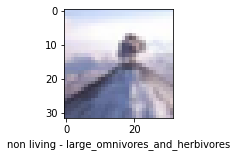

In [ ]:
plot_images(test_images, new_test_labels, train_labels, 0)

In [ ]:
print(new_train_labels)

[1 1 1 ... 1 1 1]


In [ ]:
# Writing a function to plot images and their corresponding labels
def to_plot(images, binary_label, all_labels, image):
    plt.figure(figsize = (15,2))
    plt.imshow(images[image])
    bin_label = binary_label[image]
    actual_label = classes_coarse[all_labels[image]]
    if bin_label == 1:
      plt.xlabel("human")
    else:
      plt.xlabel("non-human: " + actual_label)

### **Creating a Convolutional Neural Network for classification of Living v/s Non-living things**

In [ ]:
# Create a Convolutional Neural Network to learn the labels of all different images in our dataset. 
# Here the Network has 2 convolutional and pooling layers, one hidden layer with 64 neurons and finally the
# output layer with 2 neurons that represent either class living or class nonliving
cnn = models.Sequential([
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(2, activation='softmax')
])

cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = cnn.fit(train_images, new_train_labels, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.5578 - accuracy: 0.7230
Epoch 2/10
1563/1563 [==============================] - 10s 7ms/step - loss: 0.4452 - accuracy: 0.7977
Epoch 3/10
1563/1563 [==============================] - 10s 7ms/step - loss: 0.3953 - accuracy: 0.8267
Epoch 4/10
1563/1563 [==============================] - 10s 7ms/step - loss: 0.3527 - accuracy: 0.8486
Epoch 5/10
1563/1563 [==============================] - 10s 7ms/step - loss: 0.3181 - accuracy: 0.8658
Epoch 6/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.2793 - accuracy: 0.8842
Epoch 7/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.2433 - accuracy: 0.9008
Epoch 8/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.2056 - accuracy: 0.9174
Epoch 9/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.1770 - accuracy: 0.9317
Epoch 10/10
1563/1563 [==============================] - 10s 6ms/step - l

Text(0.5, 1.0, 'Loss vs Accuracy')

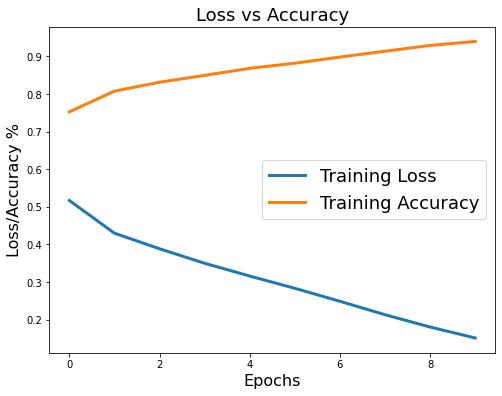

In [ ]:
plt.figure(figsize=[8,6])
plt.plot(history.history["loss"], linewidth=3)
plt.plot(history.history["accuracy"], linewidth=3)
plt.legend(["Training Loss", "Training Accuracy"], fontsize=18)
plt.xlabel("Epochs", fontsize=16)
plt.ylabel("Loss/Accuracy %", fontsize=16)
plt.title("Loss vs Accuracy", fontsize=18)

In [ ]:
# Evaluate the model on our array of new test labels which have only 0 and 1 values for living v/s nonliving
# instead of 0-19 values for all classes in the original data
cnn.evaluate(test_images, new_test_labels)

# Make predictions of labels on our testing dataset of 10000 images 
network_predictions = cnn.predict(test_images)

313/313 [==============================] - 1s 4ms/step - loss: 0.4642 - accuracy: 0.8435


### **Testing**

In [ ]:
print("We get an array of len:")
print(len(network_predictions))
print("")
print("Outputs of the network on our 10000 testing images dataset:")
print(network_predictions)
print("")
print("For every input to our network our network outputs a list of 2 values for example:")
print(network_predictions[0])

We get an array of len:
10000

Outputs of the network on our 10000 testing images dataset:
[[2.6842925e-01 7.3157078e-01]
 [5.6782681e-01 4.3217319e-01]
 [1.6954068e-04 9.9983048e-01]
 ...
 [2.4304835e-02 9.7569513e-01]
 [7.2459155e-01 2.7540842e-01]
 [1.1861008e-03 9.9881387e-01]]

For every input to our network our network outputs a list of 2 values for example:
[0.26842925 0.7315708 ]


In [ ]:
predicted_labels = []
for element in network_predictions:
  predicted_labels.append(np.argmax(element))
predicted_labels = np.array(predicted_labels)

In [ ]:
# First 100 image's original labels
print(new_test_labels[:100])

[0 0 1 1 0 1 1 1 0 1 0 1 0 0 0 1 1 1 1 1 1 0 1 1 1 0 0 0 0 1 0 0 0 1 1 1 0
 1 0 0 1 1 0 1 1 0 0 0 1 0 1 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 0 1 0 0 1 1 1 1 0 1 0 1 1 0 1 1 1 0 1 1 1 0 1]


In [ ]:
# First 100 image's predicted labels
print(predicted_labels[:100])

[1 0 1 1 0 1 1 1 0 1 1 1 0 0 0 1 1 1 1 1 1 0 0 1 1 0 0 0 0 1 0 0 0 1 1 1 0
 1 0 0 1 1 0 0 1 0 1 0 1 0 1 1 0 0 1 1 0 1 1 0 1 1 0 1 1 1 1 1 0 1 1 0 0 1
 1 1 1 0 1 0 0 1 1 0 1 0 1 1 1 1 0 0 1 1 0 1 0 1 0 1]


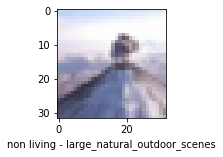

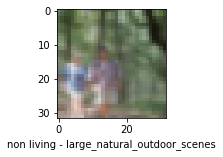

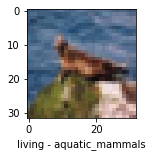

In [ ]:
# Plots of first 3 images with original labels
plot_images(test_images, new_test_labels, test_labels, 0)
plot_images(test_images, new_test_labels, test_labels, 1)
plot_images(test_images, new_test_labels, test_labels, 2)

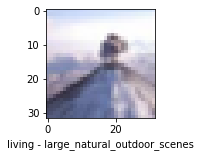

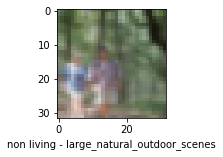

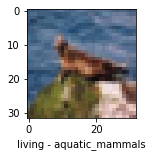

In [ ]:
# Plots of first 3 images with predicted labels
plot_images(test_images, predicted_labels, test_labels, 0)
plot_images(test_images, predicted_labels, test_labels, 1)
plot_images(test_images, predicted_labels, test_labels, 2)

In [ ]:
print("predicted: " + new_classes[predicted_labels[0]] + ", actual: " + new_classes[new_test_labels[0]])
print("predicted: " + new_classes[predicted_labels[1]] + ", actual: " + new_classes[new_test_labels[1]])
print("predicted: " + new_classes[predicted_labels[2]] + ", actual: " + new_classes[new_test_labels[2]])
print("predicted: " + new_classes[predicted_labels[3]] + ", actual: " + new_classes[new_test_labels[3]])
print("predicted: " + new_classes[predicted_labels[4]] + ", actual: " + new_classes[new_test_labels[4]])
print("predicted: " + new_classes[predicted_labels[5]] + ", actual: " + new_classes[new_test_labels[5]])
print("predicted: " + new_classes[predicted_labels[6]] + ", actual: " + new_classes[new_test_labels[6]])
print("predicted: " + new_classes[predicted_labels[7]] + ", actual: " + new_classes[new_test_labels[7]])
print("predicted: " + new_classes[predicted_labels[8]] + ", actual: " + new_classes[new_test_labels[8]])
print("predicted: " + new_classes[predicted_labels[9]] + ", actual: " + new_classes[new_test_labels[9]])

predicted: living, actual: nonliving
predicted: nonliving, actual: nonliving
predicted: living, actual: living
predicted: living, actual: living
predicted: nonliving, actual: nonliving
predicted: living, actual: living
predicted: living, actual: living
predicted: living, actual: living
predicted: nonliving, actual: nonliving
predicted: living, actual: living


### **Creating a Convolutional Neural Network to classify between Humans and Non-humans**

In [ ]:
# Creating a Convolutional Neural Network that will learn the labels of all different images in our dataset. 
# Here the Network has 2 convolutional and pooling layers, one hidden layer with 128 neurons and finally the
# output layer with 2 neurons that represent either class living or class nonliving
cnn_humans = models.Sequential([
                                layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
                                layers.MaxPooling2D((2, 2)),
                                
                                layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
                                layers.MaxPooling2D((2, 2)),
                                
                                layers.Flatten(),
                                layers.Dense(64, activation='relu'),
                                layers.Dense(2, activation='softmax')
                                ])

cnn_humans.compile(optimizer='adam',
                   loss='sparse_categorical_crossentropy',
                   metrics=['accuracy'])

training_hist = cnn_humans.fit(train_images, new_training_labels, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 37s 3ms/step - loss: 0.1885 - accuracy: 0.9467
Epoch 2/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.1409 - accuracy: 0.9570
Epoch 3/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.1242 - accuracy: 0.9618
Epoch 4/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.1111 - accuracy: 0.9655
Epoch 5/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.1025 - accuracy: 0.9673
Epoch 6/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.0935 - accuracy: 0.9696
Epoch 7/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.0863 - accuracy: 0.9717
Epoch 8/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.0720 - accuracy: 0.9758
Epoch 9/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.0649 - accuracy: 0.9782
Epoch 10/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.05

Text(0.5, 1.0, 'Training Loss & Accuracy Chart')

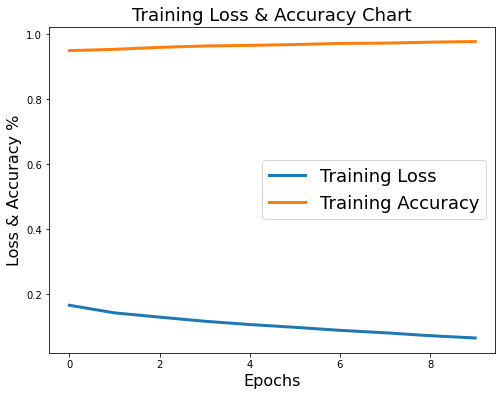

In [ ]:
plt.figure(figsize=[8,6])
plt.plot(training_hist.history["loss"], linewidth=3)
plt.plot(training_hist.history["accuracy"], linewidth=3)
plt.legend(["Training Loss", "Training Accuracy"], fontsize=18)
plt.xlabel("Epochs", fontsize=16)
plt.ylabel("Loss & Accuracy %", fontsize=16)
plt.title("Training Loss & Accuracy Chart", fontsize=18)

In [ ]:
# Evaluating the model on the array new_testing_labels which have only 0 and 1 values for humans or non-humans
# instead of 0-19 values for all classes in the original data
cnn_humans.evaluate(test_images, new_testing_labels)

# Make predictions of labels on our testing dataset of 10000 images 
model_prediction = cnn_humans.predict(test_images)

313/313 [==============================] - 1s 4ms/step - loss: 0.1536 - accuracy: 0.9639


### **Testing the Human Classification CNN Model**

In [ ]:
predictions = []
for element in model_prediction:
  predictions.append(np.argmax(element))
predictions = np.array(predictions)

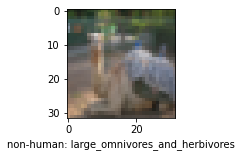

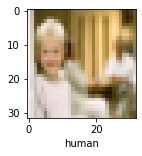

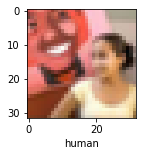

In [ ]:
# Plots of first 3 images with original labels
to_plot(test_images, new_testing_labels, test_labels, 6)
to_plot(test_images, new_testing_labels, test_labels, 88)
to_plot(test_images, new_testing_labels, test_labels, 65)

In [ ]:
ii = np.where(new_testing_labels == 1)[0]
ii

array([  37,   54,   65,   88,   99,  129,  130,  141,  188,  211,  216,
        244,  291,  325,  346,  358,  379,  408,  414,  431,  434,  454,
        463,  503,  504,  511,  512,  521,  523,  525,  534,  542,  551,
        573,  589,  600,  610,  616,  724,  748,  757,  802,  830,  842,
        850,  855,  866,  887,  930,  955,  987,  994, 1012, 1047, 1114,
       1126, 1152, 1168, 1169, 1173, 1182, 1238, 1250, 1259, 1270, 1287,
       1294, 1315, 1348, 1351, 1367, 1371, 1399, 1444, 1461, 1468, 1479,
       1521, 1541, 1561, 1609, 1622, 1654, 1665, 1669, 1673, 1682, 1730,
       1747, 1758, 1778, 1791, 1800, 1833, 1848, 1851, 1896, 1936, 1941,
       1978, 1983, 1989, 1991, 2007, 2020, 2022, 2026, 2034, 2119, 2162,
       2167, 2170, 2179, 2187, 2194, 2228, 2230, 2305, 2316, 2358, 2388,
       2391, 2427, 2433, 2451, 2452, 2457, 2497, 2498, 2521, 2552, 2593,
       2608, 2610, 2638, 2641, 2667, 2685, 2705, 2713, 2718, 2747, 2755,
       2777, 2780, 2803, 2804, 2840, 2846, 2863, 28

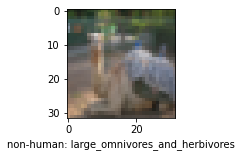

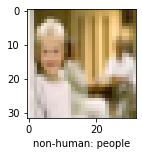

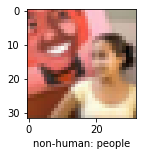

In [ ]:
# Plots of first 3 images with predicted labels
to_plot(test_images, predictions, test_labels, 6)
to_plot(test_images, predictions, test_labels, 88)
to_plot(test_images, predictions, test_labels, 65)

In [ ]:
print("predicted: " + new_superclasses[predictions[0]] + ", actual: " + new_superclasses[new_testing_labels[0]])
print("predicted: " + new_superclasses[predictions[2]] + ", actual: " + new_superclasses[new_testing_labels[2]])
print("predicted: " + new_superclasses[predictions[3]] + ", actual: " + new_superclasses[new_testing_labels[3]])
print("predicted: " + new_superclasses[predictions[37]] + ", actual: " + new_superclasses[new_testing_labels[37]])
print("predicted: " + new_superclasses[predictions[65]] + ", actual: " + new_superclasses[new_testing_labels[65]])
print("predicted: " + new_superclasses[predictions[3]] + ", actual: " + new_superclasses[new_testing_labels[3]])
print("predicted: " + new_superclasses[predictions[5]] + ", actual: " + new_superclasses[new_testing_labels[5]])
print("predicted: " + new_superclasses[predictions[88]] + ", actual: " + new_superclasses[new_testing_labels[88]])
print("predicted: " + new_superclasses[predictions[6]] + ", actual: " + new_superclasses[new_testing_labels[6]])
print("predicted: " + new_superclasses[predictions[99]] + ", actual: " + new_superclasses[new_testing_labels[99]])

predicted: non-humans, actual: non-humans
predicted: non-humans, actual: non-humans
predicted: non-humans, actual: non-humans
predicted: non-humans, actual: humans
predicted: non-humans, actual: humans
predicted: non-humans, actual: non-humans
predicted: non-humans, actual: non-humans
predicted: non-humans, actual: humans
predicted: non-humans, actual: non-humans
predicted: non-humans, actual: humans
